# Computer Infrastructure - Weather Data Automation  
**Author:** Marcella Morgan
**Image Credit:** DALL·E   

![Met Éireann Blocking Data Requests](met_eireann.png)




This notebook outlines the tasks I completed for the Computer Infrastructure module of the [Higher Diploma in Science in Data Analytics given by ATU Galway-Mayo](https://www.gmit.ie/higher-diploma-in-science-in-computing-in-data-analytics). My lecturer was [Ian McLoughlin](https://github.com/ianmcloughlin). The module focuses on three main areas:

1. **Command Line Tools**: Learning and using commands to manipulate files, create directories, and work with data.  
2. **Bash Scripting**: Automating repetitive tasks, such as downloading weather data and saving it with timestamps.  
3. **Automation with GitHub Actions**: Setting up a workflow that runs the script daily and commits the results back to my repository.  

Each task builds on the last, starting with simple commands and leading up to an automated solution. Along the way, I ran into a few challenges, from Git ignoring empty folders to formatting timestamps and learning how to make scripts executable.  

I’ll go through each task, explaining the commands, what they do, and how I tackled any issues I ran into.  


## Task 1: Creating a Directory Structure  

This task was about setting up the initial structure for the project. I created a directory named `data` with two subdirectories: `timestamps` and `weather`. These directories are used to store the files generated or downloaded for the tasks.

I used the `mkdir` command to create the directories and `cd` to navigate between them.

### Code:
```bash
# Create the directory structure
mkdir -p data/timestamps data/weather

# Navigate to the 'data' directory
cd data

# Check the structure
ls
```

## Task 2: Timestamps

In this task, I used the `date` command to output the current date and time into a file called `now.txt`. The goal was to learn how to append data to a file using the `>>` operator, ensuring the file isn’t overwritten. I repeated this step ten times and then used the `more` command to verify the contents of the file.

### Code:
```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Output the current date and time into a file called now.txt
date >> now.txt

# Verify the contents of now.txt
more now.txt
```


## Task 3: Formatting Timestamps

This task involved formatting the timestamps using the `date` command. I needed to output the date and time in a custom format: `YYYYmmdd_HHMMSS`. This is a common format used for filenames and logs as it’s both compact and sortable. The formatted timestamps were appended to a file called `formatted.txt`.

### Code:
```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Output the current date and time in custom format and append to formatted.txt
date +"%Y%m%d_%H%M%S" >> formatted.txt

# View the contents of formatted.txt
more formatted.txt
```


## Task 4: Creating Timestamped Files

This task was about creating empty files with timestamped filenames in the format `YYYYmmdd_HHMMSS.txt`. I achieved this by embedding the `date` command inside the `touch` command. This was a useful way to practise combining commands in the shell.

### Code:
```bash
# Navigate to the 'timestamps' directory
cd data/timestamps

# Use the date command to create a timestamped file
touch $(date +"%Y%m%d_%H%M%S").txt

# Verify the file was created
ls
```


## Task 5: Downloading Weather Data

In this task, I used the `wget` command to download the latest weather data for the Athenry weather station from Met Éireann. The data was saved in JSON format to a file named `weather.json`.

### Code:
```bash
# Navigate to the 'weather' directory
cd data/weather

# Use wget to download the weather data
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```


## Task 6: Timestamping the Data

For this task, I modified the `wget` command to save the weather data with a timestamped filename in the format YYYYmmdd_HHMMSS.json. This ensures that every download has a unique filename.

### Code:
```bash
# Download the weather data with a timestamped filename
wget -O $(date +"%Y%m%d_%H%M%S")_athenry.json https://prodapi.metweb.ie/observations/athenry/today

# Verify the file
ls
```


## Task 7: Writing the Weather Script

This task involved writing a Bash script called weather.sh to automate the process of downloading weather data and saving it with a timestamped filename. I made the script executable using chmod.

### Code:

```bash
# Bash script: weather.sh
#!/bin/bash
cd data/weather
wget -O $(date +"%Y%m%d_%H%M%S")_athenry.json https://prodapi.metweb.ie/observations/athenry/today

# Make the script executable
chmod +x weather.sh

# Run the script
./weather.sh
```



## Task 8: Project

For the project, I automated the `weather.sh` script so it runs daily and saves the weather data with timestamped filenames. This was done using GitHub Actions, which allowed the script to execute automatically on a schedule. To set up the GitHub action, I had to create a github/workflows flolder that contained a .yml file written in YAML. I used Chat GPT to help write the YALM file.

I realised after running the code for a couple of days that I should have maybe put my own user name and email into this part of the code: 
```yaml
    git config --global user.name "Your Name"
    git config --global user.email "your-email@example.com"
```
But it works! And I'm too afraid to change it now.

### Code:
```yaml
name: Weather Data Automation

on:
  schedule:
    # Runs daily at 08 AM (UTC) - used 8am instead of 10
    - cron: '0 08 * * *'
  workflow_dispatch: 

jobs:
  fetch-weather:
    runs-on: ubuntu-latest #This sets up a virtual Linux OS that will run the script

    steps:
    - name: Checkout Repository
      uses: actions/checkout@v3

    - name: Run Weather Script
      run: ./weather.sh

    - name: Commit and Push Changes
      run: |
        git config --global user.name "Your Name"
        git config --global user.email "your-email@example.com"
        git add data/weather/*
        git commit -m "Automated weather data update"
        git push
      env:
        GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}
```


## Task 9: Weather Data Analysis

For this task I explored the weather data retrieved from Met Éireann for Athenry using a script automated with GitHub Actions. The goal is to demonstrate data exploration and analysis with pandas, focusing on trends and key insights from the dataset. I also attempted to present the results in a polished format that would be suitable for an employer.

### Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_json('data/weather/20241218_120632_athenry.json')
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,13,05n,Rain showers,"""Rain shower""",22,-,SW,225,96,0.30,993,Wednesday,2024-12-18,00:00
1,Athenry,13,05n,Rain showers,"""Rain shower""",30,-,SW,225,94,0.70,992,Wednesday,2024-12-18,01:00
2,Athenry,12,05n,Rain showers,"""Rain shower""",22,44,SW,225,96,0.80,991,Wednesday,2024-12-18,02:00
3,Athenry,12,05n,Rain showers,"""Rain shower""",26,46,SW,225,97,0.80,991,Wednesday,2024-12-18,03:00
4,Athenry,12,09n,Rain,"""Moderate rain """,28,-,NW,315,95,1.60,993,Wednesday,2024-12-18,04:00
5,Athenry,10,46n,Light rain,"""Light rain """,20,44,W,270,93,1.90,996,Wednesday,2024-12-18,05:00
6,Athenry,10,40n,Light rain showers,"""Recent Rain""",17,-,W,270,91,0.01,999,Wednesday,2024-12-18,06:00
7,Athenry,9,04n,Cloudy,"""Cloudy""",11,-,W,270,92,0.00,1001,Wednesday,2024-12-18,07:00
8,Athenry,9,02n,Fair,"""Fair""",9,-,W,270,92,0.00,1002,Wednesday,2024-12-18,08:00
9,Athenry,9,04d,Cloudy,"""Cloudy""",11,-,W,270,91,0.00,1003,Wednesday,2024-12-18,09:00


### Looking at Data

#### Data Types:

In [2]:
dtypes_df = pd.DataFrame(df.dtypes, columns=["dtypes"])
dtypes_df.style.background_gradient()

,dtypes
name,object
temperature,int64
symbol,object
weatherDescription,object
text,object
windSpeed,int64
windGust,object
cardinalWindDirection,object
windDirection,int64
humidity,int64


#### Checking for missing values:

In [3]:
missing_values = df.isnull().sum()
missing_values_df = pd.DataFrame(missing_values, columns=["Missing Values"])
missing_values_df.style.background_gradient()


,Missing Values
name,0
temperature,0
symbol,0
weatherDescription,0
text,0
windSpeed,0
windGust,0
cardinalWindDirection,0
windDirection,0
humidity,0


#### Brief Description of dataset showing count, mean, max and min values:

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['reportTime'] = pd.to_datetime(df['reportTime']).dt.time
df['windDirection'] = df['windDirection'].astype('object')
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['reportTime'].astype(str))

df.describe(include=[float, int])

,temperature,windSpeed,humidity,rainfall,pressure
count,12.000000,12.000000,12.000000,12.000000,12.00000
mean,10.583333,17.416667,92.916667,0.510000,997.50000
std,1.676486,8.447252,2.745520,0.668036,5.40202
min,9.000000,6.000000,88.000000,0.000000,991.00000
25%,9.000000,10.500000,91.000000,0.000000,992.75000
50%,10.000000,18.500000,92.500000,0.155000,997.50000
75%,12.000000,23.000000,95.250000,0.800000,1002.25000
max,13.000000,30.000000,97.000000,1.900000,1005.00000


In [5]:
print(df['datetime'].dtype)
print(df['reportTime'].dtype)
print(df['date'].dtype)

datetime64[ns]
object
datetime64[ns]


## Closer Look at Temperature 

In [6]:
temperature_df = df[['reportTime','temperature']].copy()
temperature_df.style.background_gradient(cmap="coolwarm")


,reportTime,temperature
0,00:00:00,13
1,01:00:00,13
2,02:00:00,12
3,03:00:00,12
4,04:00:00,12
5,05:00:00,10
6,06:00:00,10
7,07:00:00,9
8,08:00:00,9
9,09:00:00,9


#### Temperature over Time:

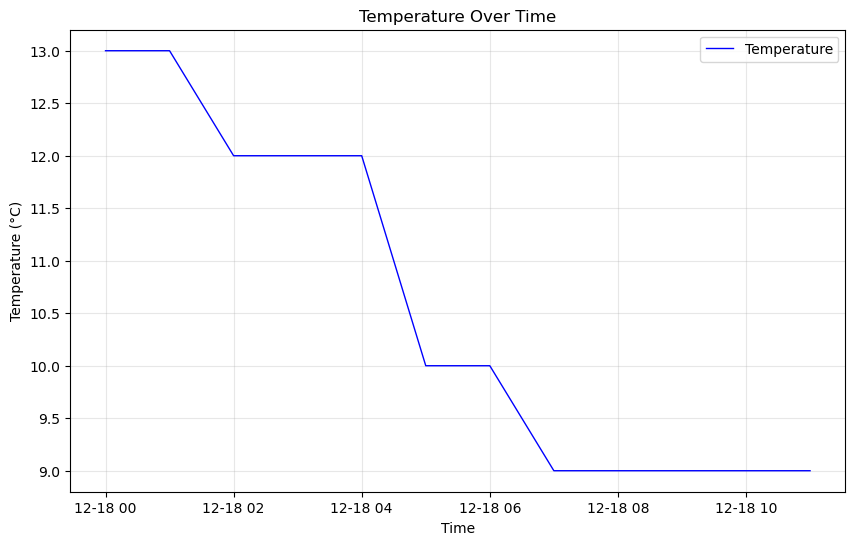

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['temperature'], label='Temperature', color='blue', linewidth=1)
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## Challenges I Faced:

A recurring issue throughout the project was the inconsistency in my local environment, which started right from the beginning. Since I wasn’t using GitHub Codespaces initially, I ran into a number of problems that slowed down progress:

1. **Missing Commands**: Some commands, like `wget` and `man`, weren’t available in my local environment. This led to a lot of unnecessary troubleshooting until I decided to switch to Codespaces. The pre-installed tools in Codespaces made it much easier to run the code as expected without needing to manually install and configure missing dependencies.

2. **Workflow Permissions**: When setting up the GitHub Actions workflow for the project, I ran into issues with permissions. The workflow initially failed to push new weather data files to the repository because the repository settings were set to read-only for workflows. After changing these permissions to allow Read and Write access, the workflow ran perfectly.

3. **Pulling Changes**: Once I had the automated workflow running, it started downloading new data files into the repository. This led to a new issue: I’d forget to pull the latest changes before making edits, which caused conflicts when pushing commits. I resolved this by regularly pulling the main branch (`git pull origin main`) before starting any new work.

These challenges highlighted the importance of having a consistent, well-configured environment and paying attention to workflow settings. Codespaces proved invaluable for reducing friction and keeping everything running smoothly.


## Links to Resources

### General Environment Issues:
https://www.geeksforgeeks.org/how-to-run-bash-script-in-linux/  
https://stackoverflow.com/questions/19986306/what-does-the-mean-when-running-commands  
https://www.reddit.com/r/learnpython/comments/1r2nqm/python_scripts_running_from_command_prompt_but/  
https://superuser.com/questions/77247/how-do-i-install-wget-for-windows  
https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command  
https://askubuntu.com/questions/1094739/man-command-not-working-in-ubuntu-18-04  

### Git and GitHub:
https://docs.github.com/en/actions/writing-workflows/choosing-what-your-workflow-does/controlling-permissions-for-github_token  
https://github.com/orgs/community/discussions/35410  
https://stackoverflow.com/questions/54278883/forgot-to-git-pull-before-working-and-now-i-cant-git-push  
https://www.reddit.com/r/git/comments/w337j4/how_to_resolve_several_merge_conflicts_when/  

### Python and Pandas
https://stackoverflow.com/questions/36692861/avoiding-error-from-pd-to-datetime-in-pandas  
https://pandas.pydata.org/docs/user_guide/style.html  
https://www.geeksforgeeks.org/make-a-gradient-color-mapping-on-a-specified-column-in-pandas/  
https://stackoverflow.com/questions/76506990/github-doesnt-reflect-pandas-styles  
https://github.com/mwaskom/seaborn/issues/1090  


## END